# Loading the data from github

In [8]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/poprawne_dane.csv"

data_raw = pd.read_csv(url)

In [9]:
import warnings

warnings.filterwarnings('ignore')


In [10]:
data_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
8,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
9,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you want to predict if you decide to create a machine learning model (see task description).

In [11]:
len(data_raw)

6466

In [12]:
data_raw.isnull().values.any()

np.False_

In [13]:
def text_split(input,at):
    parts = input.split('/')
    return parts[at]

data_raw["Deck"]=data_raw["Cabin"].map(lambda x:text_split(x,0)).values

data_raw["Num"] = data_raw["Cabin"].map(lambda x: text_split(x,1)).values

data_raw["Side"] = data_raw["Cabin"].map(lambda x: text_split(x,2)).values

## PairPlot for numeric columns

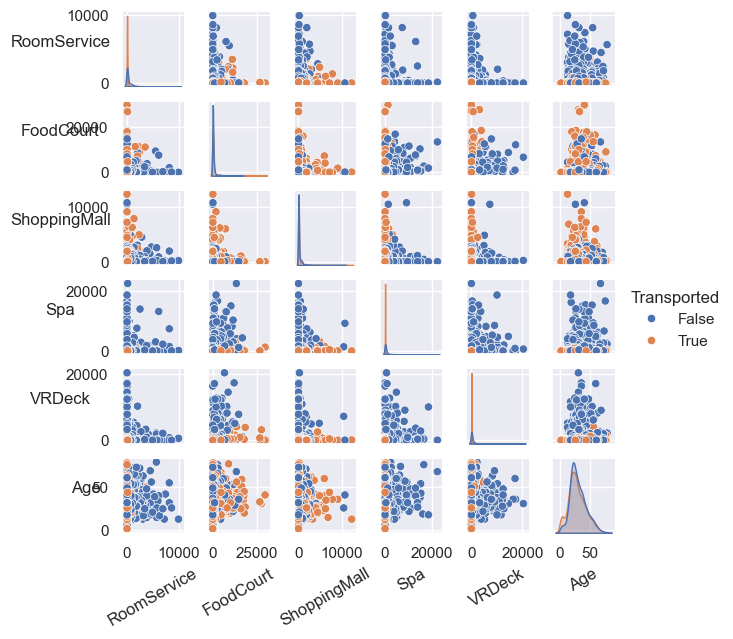

In [286]:
num_col = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Age","Transported"]
g = sns.pairplot(data_raw[num_col],hue="Transported",height=1)
for ax in g.axes.flatten():
    ax.set_ylabel(ax.get_ylabel(),rotation=0)
    ax.set_xlabel(ax.get_xlabel(),rotation=30)

# Exploring Categorical Columns

### First glimpse at the categorical data

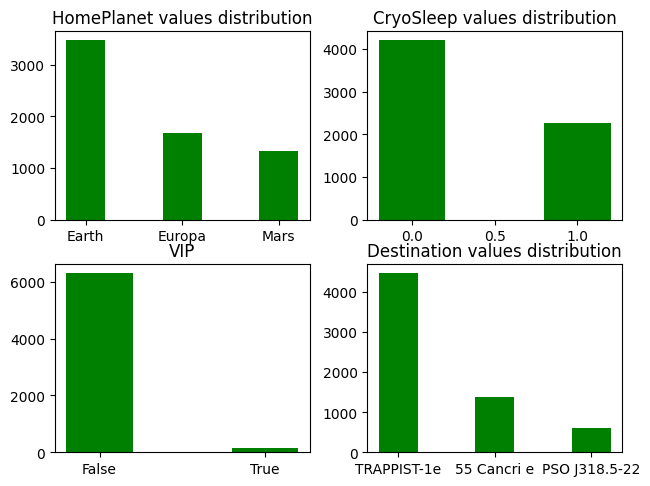

In [15]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()


home_planet= data_raw["HomePlanet"].value_counts()
cryosleep = data_raw["CryoSleep"].value_counts()
destination = data_raw["Destination"].value_counts()
vip = data_raw["VIP"].value_counts()

axs[0,0].set_title("HomePlanet values distribution")
axs[0,0].bar(home_planet.index,home_planet.values,width=0.4,color='g')

axs[0,1].set_title("CryoSleep values distribution")
axs[0,1].bar(cryosleep.index,cryosleep.values,width=0.4,color='g')

axs[1,1].set_title("Destination values distribution")
axs[1,1].bar(destination.index,destination.values,width=0.4,color='g')

axs[1,0].set_title("VIP")
axs[1,0].bar(["False","True"],vip.values,width=0.4,color='g')
plt.show()


## Most choosen routes

Text(0.5, 1.0, 'Most choosen routes by passengers')

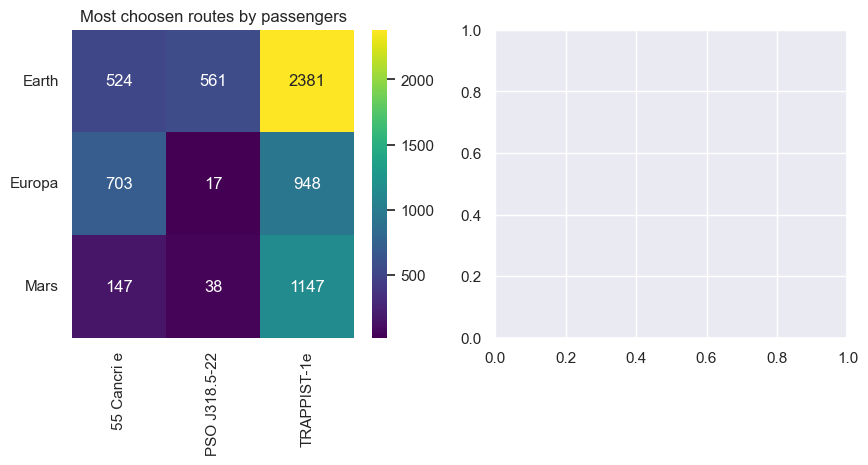

In [265]:
data_counts = data_raw.groupby(["HomePlanet","Destination"]).size().unstack(fill_value=0)


planets = data_counts.columns
destinations = data_counts.index
tablica = data_counts.values

fig,ax = plt.subplots(1,2,figsize=(10,4))

sns.heatmap(tablica,annot=True,cmap="viridis",fmt="d",xticklabels=planets,yticklabels=destinations,ax=ax[0])


ax[0].set_yticklabels(rotation=0,labels=destinations)
ax[0].set_title("Most choosen routes by passengers")


## Average expenses for vip and non-vip passengers on each atraction

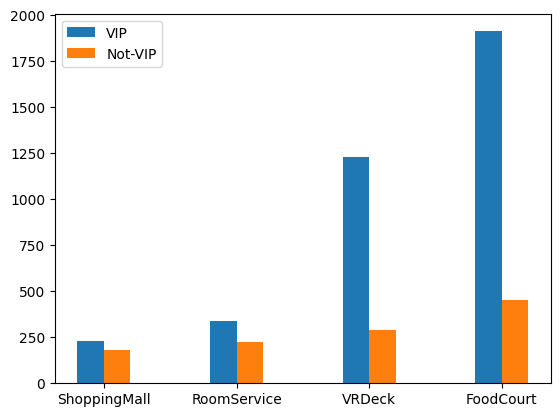

In [17]:
data_raw["Sum"]= data_raw[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum(axis=1)
data_raw

x = data_raw.groupby(["VIP"])[["RoomService","VRDeck","ShoppingMall","FoodCourt"]].mean()

vip_true = x.loc[True].sort_values().to_dict()

vip_false = x.loc[False].sort_values().to_dict()

x_ind = np.arange(len(vip_false.keys()))

plt.bar(x_ind-0.1,vip_true.values(),label="VIP",width=0.2)
plt.bar(x_ind+0.1,vip_false.values(),label="Not-VIP",width=0.2)
plt.xticks(np.arange(4),vip_false.keys())
plt.legend()
plt.show()

## VIP's choosen destination

Text(0.5, 1.0, 'VIP choosen destination')

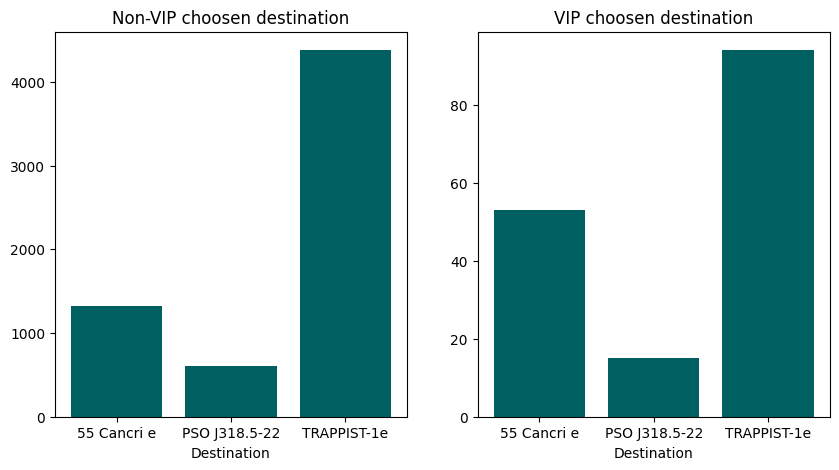

In [18]:
x = data_raw.groupby(["VIP"])["Destination"].value_counts().unstack()
fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].bar(x.iloc[0].index,x.iloc[0].values,color="#005F60")
ax[0].set_xlabel('Destination')
ax[0].set_title("Non-VIP choosen destination")
ax[1].bar(x.iloc[1].index,x.iloc[1].values,color="#005F60")
ax[1].set_xlabel('Destination')
ax[1].set_title("VIP choosen destination")

## VIP's HomePlanet

[3466. 1558. 1280.]


<BarContainer object of 3 artists>

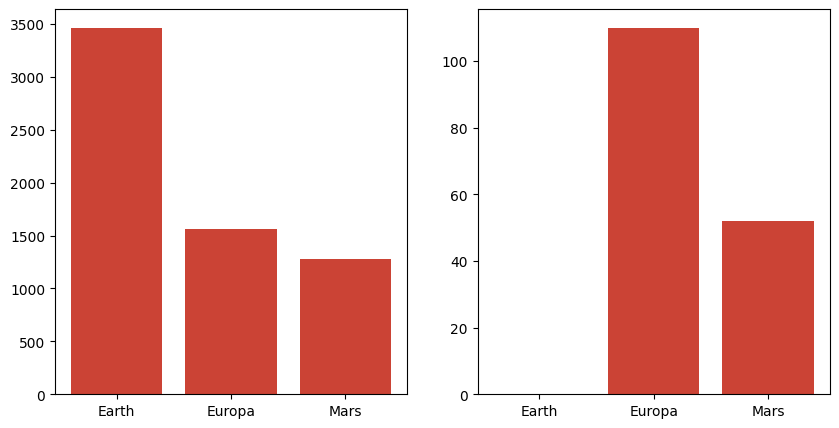

In [19]:
x = data_raw.groupby(["VIP"])["HomePlanet"].value_counts().unstack()
x =x.fillna(0)
print(x.iloc[0].values)

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].bar(x.iloc[0].index,x.iloc[0].values,color="#cb4335")
ax[1].bar(x.iloc[1].index,x.iloc[1].values,color="#cb4335")



## Expenses and Age

Text(0.5, 1.0, 'Percentage share of each age group in total expenditure')

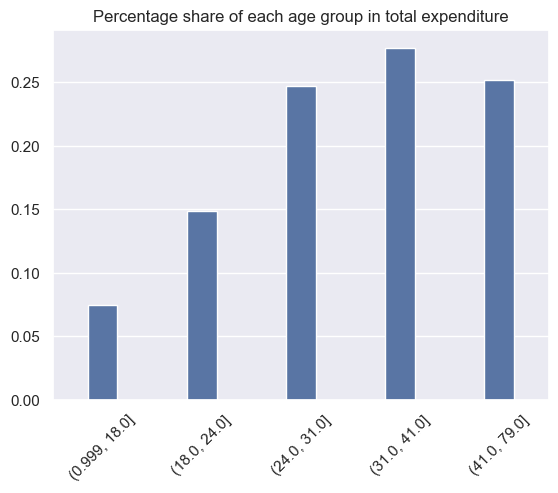

In [20]:
income = data_raw["Sum"].sum()

data_raw["Age_group"] = pd.qcut(data_raw["Age"],q=5)
x = data_raw.groupby(["Age_group"])["Sum"].sum()
x = x/income
x = x.reset_index()
sns.set_theme(style="darkgrid")
ax = sns.barplot(x,x="Age_group",y="Sum",width=0.3)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(rotation=45,labels=x["Age_group"])
ax.set_title('Percentage share of each age group in total expenditure')

Text(0, 0.5, '')

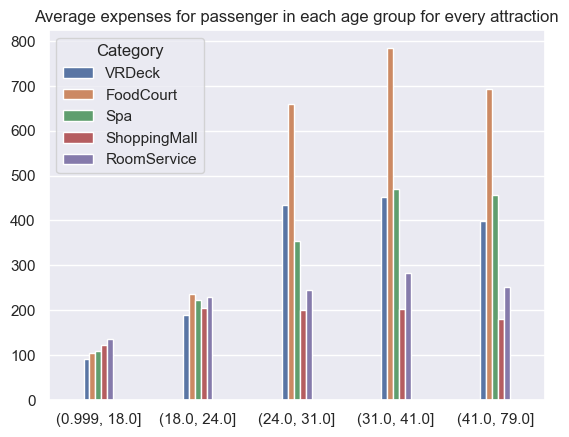

In [21]:

x = data_raw.groupby(["Age_group"])[["Sum","FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"]].mean()
x = x.reset_index()
x=pd.melt(x,id_vars='Age_group', value_vars=["FoodCourt","RoomService","ShoppingMall","Spa","VRDeck"],
                   var_name='Category', value_name='Value')

x=x.sort_values(by=["Age_group","Value"],ascending=[True,True])
z = sns.barplot(data=x,x="Age_group",y="Value",width=0.3,hue='Category',dodge=True)
z.set_title("Average expenses for passenger in each age group for every attraction")
z.set_xlabel('')
z.set_ylabel('')

## Deck with expenses summary

[Text(0, 0.5, 'A'),
 Text(0, 1.5, 'B'),
 Text(0, 2.5, 'C'),
 Text(0, 3.5, 'D'),
 Text(0, 4.5, 'E'),
 Text(0, 5.5, 'F'),
 Text(0, 6.5, 'G'),
 Text(0, 7.5, 'T')]

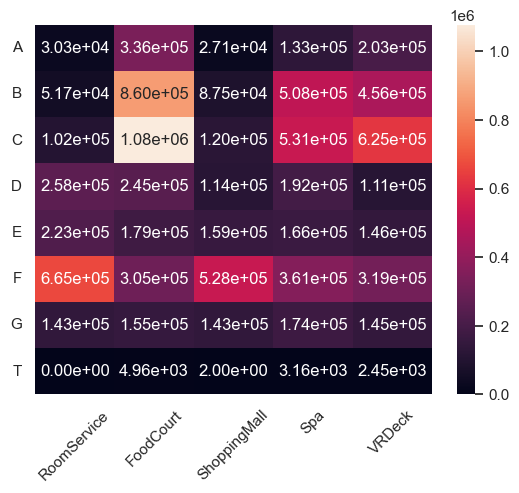

In [22]:
def get_second(input):
    sep = input.split(" ")
    return sep[1]

data_raw["Second_Name"] = data_raw["Name"].apply(get_second)
x = data_raw.groupby(["Second_Name","Deck"])
x = data_raw.groupby(["Deck"])[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].sum()

map = sns.heatmap(x.values,xticklabels=x.columns,yticklabels=x.index,fmt=".2e",annot=True)
map.set_xticklabels(rotation=45,labels=x.columns)
map.set_yticklabels(rotation=0,labels=x.index)

## Percentage share of transported and not transported passengers in each deck

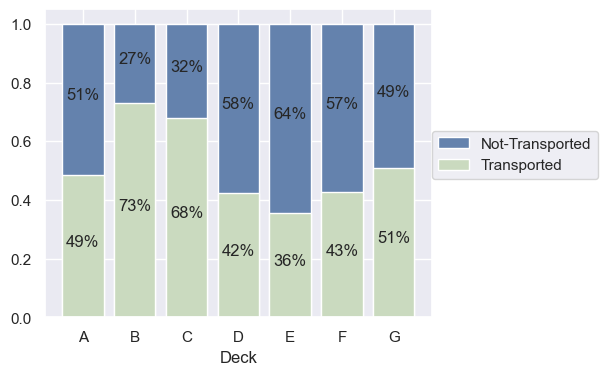

In [25]:
temp = data_raw.groupby(["Deck","Transported"]).size().unstack().reset_index()
temp.columns = temp.columns.map(str)
temp["True"] = temp["True"]/(temp["True"]+temp["False"])
temp["False"]= 1-temp["True"]
temp = temp[:-1]
temp["Sum"]=1
fig,ax = plt.subplots(figsize=(5,4))

ax.bar(temp['Deck'],np.ones(len(temp)),label='Not-Transported',color="#6482AD")
ax.bar(temp['Deck'],temp['True'],label='Transported',color="#CADABF")
ax.set_xlabel('Deck')
for i in range(len(temp)):
    ax.text(i, temp.loc[i, "True"]/2, s=f"{int(round(temp.loc[i, 'True'], 2) * 100)}%", ha='center')

for i in range(len(temp)):
    ax.text(i,(temp.loc[i,"Sum"]-temp.loc[i,"True"])/2+temp.loc[i,'True'],s=f"{round((round(temp.loc[i,'False']*100,2)))}%",ha='center')
ax.legend(loc=(1,0.45))

## Comparing Age distribution among VIP and None-VIP passengers

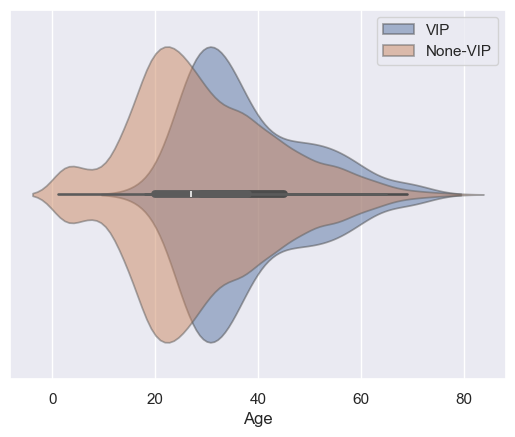

In [26]:
vip_data = data_raw[data_raw["VIP"]==True]
non_vip_data = data_raw[data_raw["VIP"]==False]
x = vip_data["Age"].mean()
sns.violinplot(vip_data["Age"],alpha=0.5,orient='h',label="VIP")
sns.violinplot(non_vip_data["Age"],alpha=0.5,orient='h',label="None-VIP")
plt.legend()

## Percentage share of each age group among total passengers on each deck

In [27]:
temp = data_raw.groupby('Deck')['Age_group'].value_counts().unstack().reset_index()
temp.columns = temp.columns.map(str)

temp["Sum"]=temp.iloc[:,1:].sum(axis=1)
temp = temp.drop([7])
for col in temp.columns[1:]:
     temp[col] = temp[col]/temp['Sum']
data_temp =temp.iloc[:,1:].cumsum(axis=1)
data_temp.columns = data_temp.columns.map(str)
data_temp = data_temp.drop(columns="Sum")

def find_level(df: pd.DataFrame):
    x = pd.DataFrame(index =df.index)
    for i,column in enumerate(df.columns):
        if i ==0:
            x[column]=df[column]/2
        else:
            x[column] = df.iloc[:,i-1]+(df.iloc[:,i]-df.iloc[:,i-1])/2
    return x
x = find_level(data_temp)

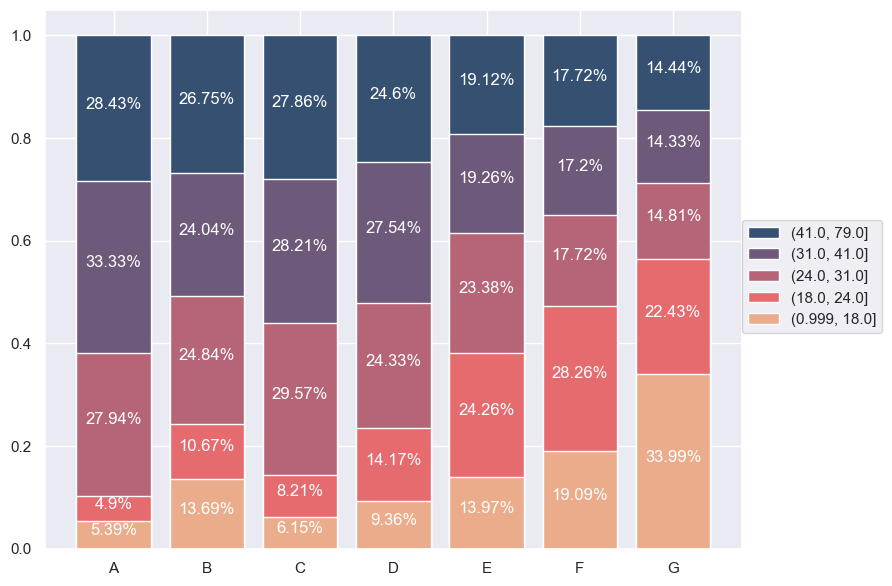

In [28]:
fig, ax = plt.subplots(figsize=(9, 7))

colors = ['#355070','#6d597a','#b56576','#e56b6f','#eaac8b']

x_cords = np.arange(len(data_temp))

for i,col in enumerate(reversed(data_temp.columns[:])):

    ax.bar(x_cords,data_temp[col],label=col,color=colors[i])

    for j,value in enumerate(temp[col]):
        
        ax.text(j,x.loc[j,col],s=f"{str(round(value*100,2))}%",ha='center',color="white")
    
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(temp["Deck"])

plt.legend(loc=(1,0.4))

## Passengers under 13 have not made any payments 

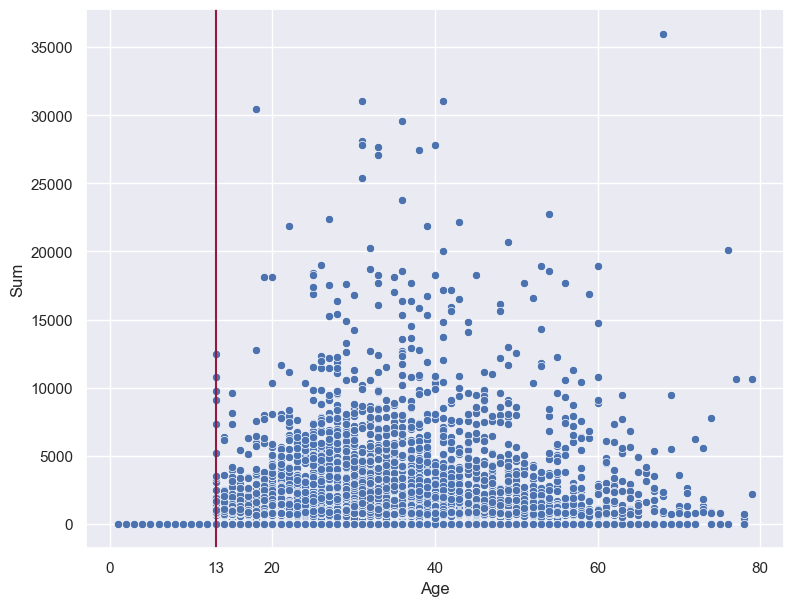

In [29]:
fig,ax = plt.subplots(figsize=(9,7))
sns.scatterplot(data_raw,y="Sum",x="Age",ax=ax)
xticks = [0,13,20,40,60,80]
ax.set_xticks(xticks)
ax.axline((13,0),(13,35000),color="#921A40")

## Size of the family

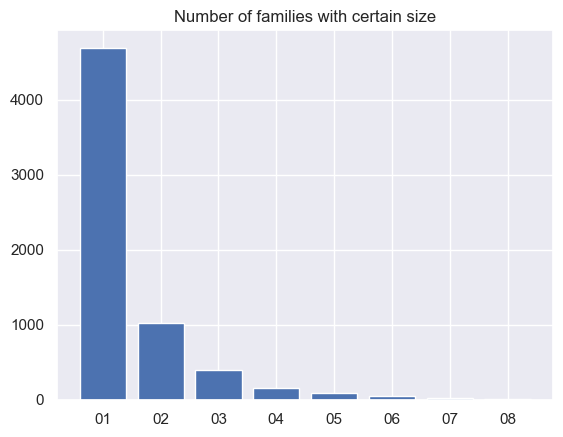

In [290]:
data_raw["PassengerId"].map(lambda x: x[5:]).value_counts().index
fig,ax = plt.subplots()
ax.bar(data_raw["PassengerId"].map(lambda x: x[5:]).value_counts().index,data_raw["PassengerId"].map(lambda x: x[5:]).value_counts().values)
ax.set_title("Number of families with certain size")
#adding new feature
data_raw["family_size"] = data_raw["PassengerId"].map(lambda x: x[5:]).astype(int)

In [32]:
pd.crosstab(data_raw["Transported"],data_raw["PassengerId"].map(lambda x: x[5:]))

PassengerId,01,02,03,04,05,06,07,08
Transported,,,,,,,,
False,2477,463,167,61,42,27,12,6
True,2216,564,228,97,55,29,16,6


## Correlation between numerical features

Text(0.5, 1.0, 'kendall')

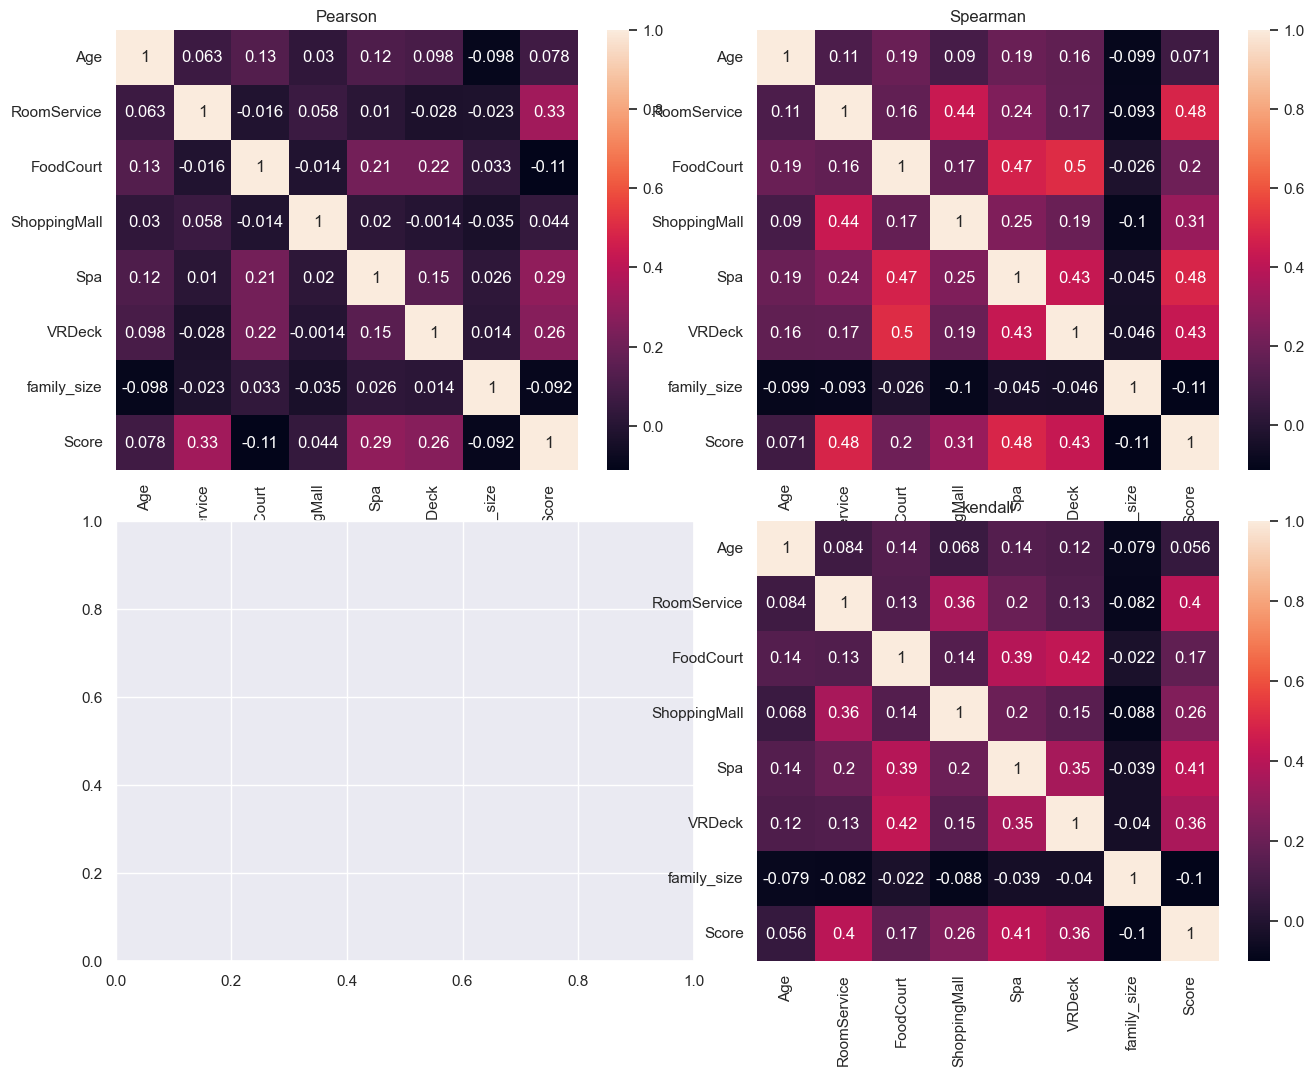

In [273]:
fig,ax = plt.subplots(2,2,figsize=(13,10))
fig.tight_layout()
sns.heatmap(data_raw.select_dtypes(include='number').drop(columns="Sum").corr(),ax=ax[0,0],annot=True)
ax[0,0].set_title("Pearson")

sns.heatmap(data_raw.select_dtypes(include="number").drop(columns="Sum").corr("spearman"),ax=ax[0,1],annot=True)
ax[0,1].set_title("Spearman")

sns.heatmap(data_raw.select_dtypes(include="number").drop(columns="Sum").corr("kendall"),ax=ax[1,1],annot=True)
ax[1,1].set_title("kendall")


In [153]:
mca_cols = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Side","family_size"]
mca = prince.CA(n_components=2)
x = data_raw[mca_cols].apply(LabelEncoder().fit_transform)
x = mca.fit(x)
mca.row_coordinates

<bound method CA.row_coordinates of <prince.ca.CA object at 0x0000022E53CA4130>>

## Cramer's V correlation

HomePlanet 6.906355062633543e-59
CryoSleep 0.0
Destination 5.307628327920158e-23
VIP 0.0014996664441523388
Deck 4.547943430622552e-65
Num 0.13464484852990127
Side 1.0899346531764423e-17


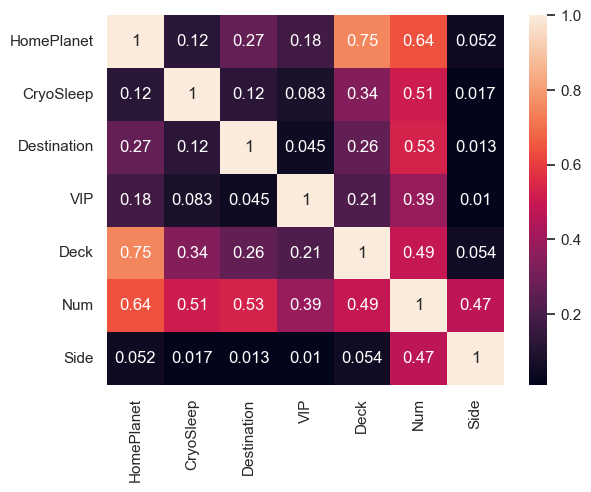

In [38]:
from scipy.stats import chi2_contingency
x = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Num","Side"]
data_raw["Num_group"] = pd.qcut(data_raw["Num"].astype(int),6)
matrix = pd.DataFrame(np.nan,columns = x,index=x)

for icol in x:
    for jcol in x:

        contingency_table = pd.crosstab(data_raw[icol],data_raw[jcol])

        chi2_stat, p, dof, ex = chi2_contingency(contingency_table, correction=False)

        sum = contingency_table.sum().sum()
        cramer = np.sqrt(chi2_stat / (sum * (min(contingency_table.shape) - 1)))

        matrix.loc[icol, jcol] = cramer
        matrix.loc[jcol, icol] = cramer

sns.heatmap(matrix,annot=True)   
for col in x:
    contingency_table = pd.crosstab(data_raw[col],data_raw["Transported"])

    chi2_stat, p, dof, ex = chi2_contingency(contingency_table)
    print(col,p)

# UMAP Dimension Reduction

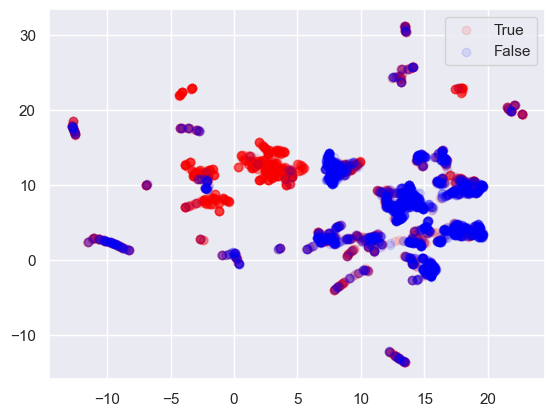

In [228]:
import umap

reducer = umap.UMAP()

X = data_raw[["FoodCourt","Spa","RoomService","Age","VRDeck","family_size","ShoppingMall"]]

Y = data_raw[["HomePlanet","CryoSleep","Destination","VIP","Deck","Side"]]

X = StandardScaler().fit_transform(X)

Y = OneHotEncoder().fit_transform(Y).toarray()

X = np.concat([X,Y],axis=1)

embedding = reducer.fit_transform(X)

fig,ax = plt.subplots()
embedding_true = embedding[data_raw["Transported"].loc[lambda x: x==True].index]
embedding_false = embedding[data_raw["Transported"].loc[lambda x:x==False].index]

ax.scatter(embedding_true[:,0],embedding_true[:,1],label="True",alpha=0.1,c="red")
ax.scatter(embedding_false[:,0],embedding_false[:,1],label="False",alpha=0.1,c="blue")

ax.legend()



In [289]:
import plotly.graph_objs as go
reducer = umap.UMAP(n_components=3)

X = data_raw[["FoodCourt","Spa","RoomService","Age","VRDeck","family_size","ShoppingMall"]]

Y = data_raw[["HomePlanet","CryoSleep","Destination","VIP","Deck","Side"]]

X = StandardScaler().fit_transform(X)

Y = OneHotEncoder().fit_transform(Y).toarray()

X = np.concat([X,Y],axis=1)

embedding = reducer.fit_transform(X)

scatter = go.Scatter3d(x=embedding[:,0],y=embedding[:,1],z=embedding[:,2],mode='markers',marker=dict(size=5,colorscale='RdBu',  opacity=0.8,color=data_raw["Transported"].astype(int),))


layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0))


fig = go.Figure(data=[scatter], layout=layout)


fig.show()

## PCA

In [ ]:
import plotly.graph_objs as go
model_pca = deepcopy(data_raw)
model_pca["Num_group"] = pd.qcut(model_pca["Num"].astype(int),q=10)
X = model_pca[["FoodCourt","Spa","RoomService"]]
Z = model_pca[["Num_group","Deck"]]

scaler = StandardScaler()
X = scaler.fit_transform(X)
enc = OneHotEncoder()
Z = enc.fit_transform(Z).toarray()
X = np.concat([X,Z], axis=1)

pca = PCA(n_components=3)

X = np.concat([X,Z], axis=1)

X = pca.fit_transform(X)
x = X[:,0]
y = X[:,1]
z = X[:,2]
scatter = go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=5,colorscale='RdBu',  opacity=0.8,color=data_raw["Transported"].astype(int),))


layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0))


fig = go.Figure(data=[scatter], layout=layout)


fig.show()

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder,Normalizer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, SelectKBest,chi2
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from copy import deepcopy

In [ ]:
from sklearn.metrics import confusion_matrix
def show_predictions(y_preds,y_true):
    x = confusion_matrix(y_preds,y_true)
    #x = x.replace({1:"True",0:"False"})
    plt.subplots(figsize=(3,2))
    ax = sns.heatmap(x,annot=True,fmt=".1f")
    
    
    ax.xaxis.tick_top()
    

## Model 0 (Kneighbours)

In [124]:
model_0 = deepcopy(data_raw)


numerical_col = ["RoomService","FoodCourt","ShoppingMall","Spa",
                                    "VRDeck"]

categorical_col = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Side","family_size"]

model0_X = model_0.drop(columns="Transported")
model0_Y = model_0[["Transported"]]
model0_X_train, model0_X_test, model0_Y_train, model0_Y_test = train_test_split(model0_X,model0_Y)




numerical_features = Pipeline(
    steps=[('scaler',StandardScaler()),
           ('selector',SelectKBest(k=4))]
)

categorical_features = Pipeline(
    steps=[('enc',OneHotEncoder()),
           ('selector',SelectKBest(k=5))]
)

preprocessor = ColumnTransformer(
    transformers=[('num',numerical_features,numerical_col),
                  ('cat',categorical_features,categorical_col)]
)

clf = Pipeline(
    steps=[('preprocessor',preprocessor),
           ('knn',KNeighborsClassifier())]
)
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 20],  
    'knn__weights': ['uniform', 'distance'],  
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],  #
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'knn__p': [1, 2]  
}
search_0 = GridSearchCV(clf,param_grid,cv=3)
search_0.fit(model0_X_train,model0_Y_train)
labels = search_0.best_estimator_.predict(model0_X_test)
print(accuracy_score(labels,model0_Y_test))
probs = search_0.best_estimator_.predict_proba(model0_X)


probabilities_df = pd.DataFrame(probs[:, 0], columns=['Score'])
data_raw = data_raw.drop(columns="Score")
data_raw = pd.concat([data_raw.reset_index(drop=True), probabilities_df.reset_index(drop=True)], axis=1)

0.75139146567718


## Model 1 (Random Forest)

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, VarianceThreshold
from copy import deepcopy
model_1 = deepcopy(data_raw)

numerical_col = ["RoomService","FoodCourt","ShoppingMall","Spa",
                                    "VRDeck","Score","family_size"]

categorical_col = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Side"]

model1_X = model_1.drop(columns="Transported")
model1_Y = model_1[["Transported"]]
model1_X_train, model1_X_test, model1_Y_train, model1_Y_test = train_test_split(model1_X,model1_Y)


numerical_features = Pipeline(
    steps=[
           ('selector',SelectKBest(k=5))]
)

categorical_features = Pipeline(
    steps=[('encoder',OneHotEncoder()),
           ('selector',SelectKBest(chi2,k=10))]
)

preprocessor = ColumnTransformer(
    transformers = [('num',numerical_features,numerical_col),
    ('cat',categorical_features,categorical_col)]
)
parameters = {
    "classifier__n_estimators":[50,100,200,300,400,500],
    "classifier__max_depth":[5,7,9,11,13,15,17,19,21,23,25,27,29],
    "classifier__criterion":['gini','entropy'],
    "classifier__max_features":['sqrt','log2'],
    "classifier__warm_start":[True,False]
}

clf_1 = Pipeline(
    steps=[("preprocess",preprocessor),
           ("classifier",RandomForestClassifier())]
)

search_1 = GridSearchCV(clf_1,parameters,cv=5, n_jobs=-1, verbose=2)
search_1.fit(model1_X_train,model1_Y_train)

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('selector',
                                                                                          SelectKBest(k=5))]),
                                                                         ['RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'Score',
                                                                          'family_size']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder()),
                                                                                         ('selector',
                                                                                          SelectKBest(score_func=<function chi2 at 0x0000022E2A9B13A0>))])...
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Deck',
                                                                          'Side'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [5, 7, 9, 11, 13, 15, 17, 19,
                                                   21, 23, 25, 27, 29],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [50, 100, 200, 300, 400,
                                                      500],
                         'classifier__warm_start': [True, False]},
             verbose=2)

In [154]:
from sklearn.metrics import accuracy_score
labels = search_1.best_estimator_.predict(model1_X_test)
print(accuracy_score(model1_Y_test,labels))


0.8051948051948052


In [196]:
from sklearn.model_selection import cross_val_score
score_rand_forest = cross_val_score(search_1, model1_X,model1_Y, cv = 5, scoring = "accuracy")

Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits


In [198]:
score_rand_forest [~np.isnan(score_rand_forest )].mean(), score_rand_forest [~np.isnan(score_rand_forest )].std()

(np.float64(0.8099768280277466), np.float64(0.012810585681862925))

## Model 2 (AdaBoost)

In [199]:
from sklearn.ensemble import AdaBoostClassifier


model_2 = deepcopy(data_raw)

model_2_Y = model_2["Transported"]

model_2_X = model_2.drop(columns = ["Transported"])

numerical_col = ["RoomService","FoodCourt","ShoppingMall","Spa",
                                    "VRDeck","Score","Sum","family_size"]
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Side"]

X_2_train,X_2_test,Y_2_train,Y_2_test = train_test_split(model_2_X,model_2_Y)

numerical_features = Pipeline(
    steps=[
           ('selector',SelectKBest(k=5))
           ]
)

categorical_features = Pipeline(
    steps=[('encoder',OneHotEncoder()),
           ('selector',SelectKBest(k=10))]
)

preprocessor = ColumnTransformer(
    transformers=[('num',numerical_features,numerical_col),
                  ('cat',categorical_features,categorical_col)]
)
param_grid = {
    'clf__n_estimators': [50, 100, 200,300,350,400],       
    'clf__learning_rate': [0.01, 0.05,0.1,0.5, 1, 10,],  
    'clf__algorithm': ['SAMME', 'SAMME.R']     
}
clf = Pipeline(
    steps=[('preprocessor',preprocessor),
           ('clf',AdaBoostClassifier())]
)

search_2 = GridSearchCV(clf,param_grid=param_grid,cv=3)
search_2.fit(X_2_train,Y_2_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('selector',
                                                                                          SelectKBest(k=5))]),
                                                                         ['RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'Score',
                                                                          'Sum',
                                                                          'family_size']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder()),
                                                                                         ('selector',
                                                                                          SelectKBest())]),
                                                                         ['HomePlanet',
                                                                          'CryoSleep',
                                                                          'Destination',
                                                                          'VIP',
                                                                          'Deck',
                                                                          'Side'])])),
                                       ('clf', AdaBoostClassifier())]),
             param_grid={'clf__algorithm': ['SAMME', 'SAMME.R'],
                         'clf__learning_rate': [0.01, 0.05, 0.1, 0.5, 1, 10],
                         'clf__n_estimators': [50, 100, 200, 300, 350, 400]})

In [200]:
labels = search_2.predict(X_2_test)
accuracy_score(labels,Y_2_test)

0.8188002473716759

In [201]:
score_ada_boost = cross_val_score(search_2, model_2_X,pd.DataFrame(model_2_Y), cv = 5, scoring = "accuracy")

In [203]:
score_ada_boost[~np.isnan(score_ada_boost)].mean(), score_ada_boost[~np.isnan(score_ada_boost)].std()

(np.float64(0.8134566581915941), np.float64(0.013300054580161667))

## Model 3 (XGBoost)

In [221]:
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.feature_selection import f_regression, chi2,f_classif
from sklearn.preprocessing import Normalizer
import xgboost as xgb

model_3 = deepcopy(data_raw)



numerical_col = ["RoomService","FoodCourt","ShoppingMall","Spa",
                                    "VRDeck","Score","Sum","family_size"]
categorical_col = ["HomePlanet","CryoSleep","Destination","VIP","Deck","Side","Age_group"]

model3_X = model_3.drop(columns="Transported")
model3_Y = model_3[["Transported"]]
model3_X_train, model3_X_test, model3_Y_train, model3_Y_test = train_test_split(model3_X,model3_Y)


numeric_transformer = Pipeline(
    steps=[
           ('feature_selection',SelectKBest(k=5))]
)

categorical_transformer = Pipeline(
    steps=[('cat',OneHotEncoder()),
           ('feature_selection',SelectKBest(k=10))]
)

preprocessor = ColumnTransformer(
    transformers=[('numerical',numeric_transformer,numerical_col),
                  ('categorical',categorical_transformer,categorical_col)]
)
params = {
        'xgboost_tree__min_child_weight': [1, 5, 10],
        'xgboost_tree__gamma': [0.5, 1, 1.5, 2, 5],
        'xgboost_tree__subsample': [0.6, 0.8, 1.0],
        'xgboost_tree__colsample_bytree': [0.6, 0.8, 1.0],
        'xgboost_tree__max_depth': [3, 4, 5]
        }
clf = Pipeline(
    steps=[('preprocessor',preprocessor),
           ('xgboost_tree',xgb.XGBClassifier())]
)

search_3 = GridSearchCV(clf,cv=5,param_grid=params)
search_3.fit(model3_X_train,model3_Y_train)





GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('feature_selection',
                                                                                          SelectKBest(k=5))]),
                                                                         ['RoomService',
                                                                          'FoodCourt',
                                                                          'ShoppingMall',
                                                                          'Spa',
                                                                          'VRDeck',
                                                                          'Score',
                                                                          'Sum',
                                                                          'family_size']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('cat',
                                                                                          OneHotEncoder()),
                                                                                         ('feature_selection',
                                                                                          SelectKBest())]),
                                                                         ['HomePl...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgboost_tree__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgboost_tree__gamma': [0.5, 1, 1.5, 2, 5],
                         'xgboost_tree__max_depth': [3, 4, 5],
                         'xgboost_tree__min_child_weight': [1, 5, 10],
                         'xgboost_tree__subsample': [0.6, 0.8, 1.0]})

In [227]:
lab = search_3.predict(model3_X_test)
accuracy_score(lab,model3_Y_test)

0.8045763760049475

In [226]:
x = cross_val_score(search_3,model3_X,model3_Y,cv=5,scoring="accuracy")
x[~np.isnan(x)].mean(),x[~np.isnan(x)].std()

(np.float64(0.8148095021223543), np.float64(0.010420476698249014))

## Voting classifier

In [211]:
from sklearn.ensemble import VotingClassifier
Y = data_raw["Transported"]
X = data_raw.drop(columns="Transported")

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

search_4 = VotingClassifier(
    estimators=[('1',search_1),
                ('2',search_2),
                ('3',search_3)],voting='hard'
)
search_4.fit(pd.DataFrame(X_train),pd.DataFrame(Y_train))

Fitting 5 folds for each of 624 candidates, totalling 3120 fits


VotingClassifier(estimators=[('1',
                              GridSearchCV(cv=5,
                                           estimator=Pipeline(steps=[('preprocess',
                                                                      ColumnTransformer(transformers=[('num',
                                                                                                       Pipeline(steps=[('selector',
                                                                                                                        SelectKBest(k=5))]),
                                                                                                       ['RoomService',
                                                                                                        'FoodCourt',
                                                                                                        'ShoppingMall',
                                                                                                        'Spa',
                                                                                                        'VRDeck',
                                                                                                        'Score',
                                                                                                        'family_size']),
                                                                                                      ('cat',
                                                                                                       Pipeline(steps=[('encoder',
                                                                                                                        OneHotEncoder()),
                                                                                                                       ('selector',
                                                                                                                        SelectKBest(score_func=<fun...
                                                                                    missing=nan,
                                                                                    monotone_constraints=None,
                                                                                    multi_strategy=None,
                                                                                    n_estimators=None,
                                                                                    n_jobs=None,
                                                                                    num_parallel_tree=None,
                                                                                    random_state=None, ...))]),
                                           param_grid={'xgboost_tree__colsample_bytree': [0.6,
                                                                                          0.8,
                                                                                          1.0],
                                                       'xgboost_tree__gamma': [0.5,
                                                                               1,
                                                                               1.5,
                                                                               2,
                                                                               5],
                                                       'xgboost_tree__max_depth': [3,
                                                                                   4,
                                                                                   5],
                                                       'xgboost_tree__min_child_weight': [1,
                                                                                          5,
                                                                                          10]

In [214]:
lab = search_4.predict(X_test)
accuracy_score(lab,Y_test)

0.8045763760049475

In [215]:
x = cross_val_score(search_4,X,Y,cv=5,scoring="accuracy")
x[~np.isnan(x)].mean(),x[~np.isnan(x)].std()

Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits
Fitting 5 folds for each of 624 candidates, totalling 3120 fits


(np.float64(0.8134563593526432), np.float64(0.0106448901174353))